In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
df_weiss = pd.read_csv('../data/fuellstandsensoren-glassammelstellen-weissglas.csv',sep=';')
df_gruen = pd.read_csv('../data/fuellstandsensoren-glassammelstellen-gruenglas.csv',sep=';')
df_braun = pd.read_csv('../data/fuellstandsensoren-glassammelstellen-braunglas.csv',sep=';')


In [3]:
df_weiss = df_weiss[['measured_at','data_distance','geo_point_2d','device_id']]
df_gruen = df_gruen[['measured_at','data_distance','geo_point_2d','device_id']]
df_braun = df_braun[['measured_at','data_distance','geo_point_2d','device_id']]

df_weiss['color'] = 'weiss'
df_gruen['color'] = 'gruen'
df_braun['color'] = 'braun'


In [4]:
df = pd.concat([df_weiss,df_braun,df_gruen])

In [5]:
df[df['data_distance'] == 300]

,measured_at,data_distance,geo_point_2d,device_id,color
2445,2022-09-12T08:41:13+02:00,300.0,"47.42698634048571, 9.373975357061",a7bbd831-d444-4011-b6df-37b47b8e218d,weiss
2446,2022-09-12T08:11:13+02:00,300.0,"47.42698634048571, 9.373975357061",a7bbd831-d444-4011-b6df-37b47b8e218d,weiss
2453,2022-09-12T06:41:14+02:00,300.0,"47.42698634048571, 9.373975357061",a7bbd831-d444-4011-b6df-37b47b8e218d,weiss
2456,2022-09-12T05:41:14+02:00,300.0,"47.42698634048571, 9.373975357061",a7bbd831-d444-4011-b6df-37b47b8e218d,weiss
2459,2022-09-12T05:11:14+02:00,300.0,"47.42698634048571, 9.373975357061",a7bbd831-d444-4011-b6df-37b47b8e218d,weiss
...,...,...,...,...,...
838647,2022-07-10T04:39:26+02:00,300.0,"47.43919, 9.40665",134fc269-ec25-466f-82e7-780beb314108,gruen
838655,2022-07-10T02:09:27+02:00,300.0,"47.43919, 9.40665",134fc269-ec25-466f-82e7-780beb314108,gruen
838667,2022-07-10T00:09:28+02:00,300.0,"47.43919, 9.40665",134fc269-ec25-466f-82e7-780beb314108,gruen
838679,2022-07-09T21:09:43+02:00,300.0,"47.43919, 9.40665",134fc269-ec25-466f-82e7-780beb314108,gruen


In [6]:
df.dropna(subset=['data_distance'],inplace=True)
df = df[df['data_distance'] != 2500]
df = df[df['data_distance'] != 300]

In [38]:
df['datetime'] = pd.to_datetime(df['measured_at'])


/tmp/ipykernel_163991/2099485442.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['measured_at'])


AttributeError: module 'datetime' has no attribute 'timestamp'

In [40]:

df['seconds'] = df['datetime'].apply(lambda x: dt.timestamp(x))

In [41]:
df.sort_values(by=['datetime'],inplace=True)

In [9]:
df[['device_id','measured_at']].groupby(['device_id']).agg(startdate=('measured_at','min'),enddate=('measured_at','max'))

,startdate,enddate
device_id,,
04c14b60-34a4-40ab-aae2-bf4d616eb0d6,2020-06-24T19:27:40+02:00,2021-03-23T17:42:17+01:00
0b011106-e5fe-4202-92bd-c89abd042249,2020-06-16T16:26:04+02:00,2021-10-23T14:14:18+02:00
11d4bcfe-bde2-42bd-8ebc-43ee77012480,2020-06-16T16:06:38+02:00,2022-04-07T08:15:06+02:00
134fc269-ec25-466f-82e7-780beb314108,2020-06-16T16:21:58+02:00,2023-07-01T01:34:52+02:00
1607ca61-c966-483d-bbfb-d97027d507c1,2020-06-16T16:14:02+02:00,2021-03-24T14:17:18+01:00
18def07f-6077-4543-a572-982cd63ef262,2020-06-16T16:23:15+02:00,2023-11-20T14:25:46+01:00
195f9fb4-4486-4b3d-bb41-8a9d7715a931,2020-06-16T16:47:00+02:00,2020-07-28T14:43:08+02:00
1e8d1b09-d186-495e-bd1f-cb06afdd5b21,2020-06-16T16:01:40+02:00,2022-04-07T08:00:11+02:00
286bb721-9cb2-448a-9c2f-aadd4a1bf2d6,2020-07-07T00:06:07+02:00,2021-03-21T12:18:21+01:00


In [10]:
df[df['device_id'] == 'fa37f819-027b-4f6e-8e7d-1c80488f036f']

,measured_at,data_distance,geo_point_2d,device_id,color,datetime
91682,2020-06-16T16:17:33+02:00,881.0,"47.43920554529265, 9.406655639484512",fa37f819-027b-4f6e-8e7d-1c80488f036f,braun,2020-06-16 16:17:33+02:00
91670,2020-06-16T16:47:33+02:00,881.0,"47.43920554529265, 9.406655639484512",fa37f819-027b-4f6e-8e7d-1c80488f036f,braun,2020-06-16 16:47:33+02:00
316722,2020-06-16T17:17:33+02:00,881.0,"47.43920554529265, 9.406655639484512",fa37f819-027b-4f6e-8e7d-1c80488f036f,braun,2020-06-16 17:17:33+02:00
340030,2020-06-16T17:47:33+02:00,860.0,"47.43920554529265, 9.406655639484512",fa37f819-027b-4f6e-8e7d-1c80488f036f,braun,2020-06-16 17:47:33+02:00
340024,2020-06-16T18:17:33+02:00,903.0,"47.43920554529265, 9.406655639484512",fa37f819-027b-4f6e-8e7d-1c80488f036f,braun,2020-06-16 18:17:33+02:00
...,...,...,...,...,...,...
614517,2023-12-01T21:34:49+01:00,1139.0,"47.43920554529265, 9.406655639484512",fa37f819-027b-4f6e-8e7d-1c80488f036f,braun,2023-12-01 21:34:49+01:00
601084,2023-12-01T22:04:49+01:00,1139.0,"47.43920554529265, 9.406655639484512",fa37f819-027b-4f6e-8e7d-1c80488f036f,braun,2023-12-01 22:04:49+01:00
590475,2023-12-01T22:34:49+01:00,1139.0,"47.43920554529265, 9.406655639484512",fa37f819-027b-4f6e-8e7d-1c80488f036f,braun,2023-12-01 22:34:49+01:00
601083,2023-12-01T23:04:48+01:00,1139.0,"47.43920554529265, 9.406655639484512",fa37f819-027b-4f6e-8e7d-1c80488f036f,braun,2023-12-01 23:04:48+01:00


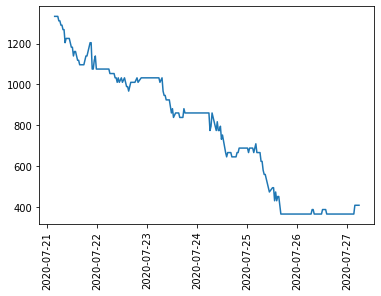

In [42]:
device_id = '195f9fb4-4486-4b3d-bb41-8a9d7715a931'
#device_id = 'f2aaa75a-0ea0-4e4a-8363-7c7a98c160d9'
device_df = df[(df['device_id'] == device_id) & (~df['data_distance'].isna())].sort_values(by=['measured_at'])
device_df['datetime'] = pd.to_datetime(device_df['measured_at'])
plt.plot(device_df['datetime'].values[-300:-55],device_df['data_distance'].values[-300:-55])
plt.xticks(rotation='vertical')
test_data = device_df[['datetime','data_distance','seconds']].iloc[-300:-55,:]


In [43]:
test_data

,datetime,data_distance,seconds
311329,2020-07-21 05:43:49+02:00,1333.0,1.595303e+09
311308,2020-07-21 07:13:48+02:00,1333.0,1.595308e+09
180997,2020-07-21 07:43:48+02:00,1311.0,1.595310e+09
667621,2020-07-21 08:13:48+02:00,1311.0,1.595312e+09
110372,2020-07-21 08:43:48+02:00,1290.0,1.595314e+09
...,...,...,...
46611,2020-07-27 05:43:15+02:00,408.0,1.595821e+09
112321,2020-07-27 06:13:15+02:00,408.0,1.595823e+09
274770,2020-07-27 06:43:15+02:00,408.0,1.595825e+09
112300,2020-07-27 07:13:15+02:00,408.0,1.595827e+09


In [44]:
from sklearn.linear_model import LinearRegression

In [55]:
import sys

In [56]:
sys.path.append('../scripts/')

In [73]:
import linreg
rate = linreg.fuellrate(test_data)

In [58]:
rate

6.871904581875194

In [45]:
reg = LinearRegression().fit(test_data['seconds'].values.reshape(-1,1),test_data['data_distance'])

In [46]:
reg.coef_[0] *  60*60

-6.871904581875194

In [49]:
preds = reg.predict(test_data['seconds'].values.reshape(-1,1))

(array([18463.91666667, 18464.91666667, 18465.91666667, 18466.91666667,
        18467.91666667, 18468.91666667, 18469.91666667]),
 [Text(18463.916666666668, 0, '2020-07-21'),
  Text(18464.916666666668, 0, '2020-07-22'),
  Text(18465.916666666668, 0, '2020-07-23'),
  Text(18466.916666666668, 0, '2020-07-24'),
  Text(18467.916666666668, 0, '2020-07-25'),
  Text(18468.916666666668, 0, '2020-07-26'),
  Text(18469.916666666668, 0, '2020-07-27')])

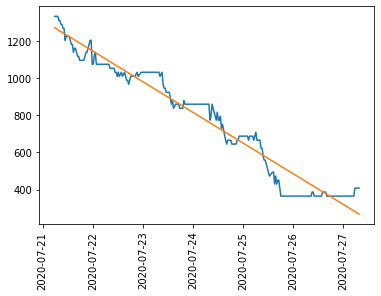

In [52]:
# & (df['measured_at'] < '2020-03-01') ]
plt.plot(test_data['datetime'],test_data['data_distance'])
plt.plot(test_data['datetime'],preds)
plt.xticks(rotation='vertical')

79d9a5cb-3704-4a21-aedf-5989c70baed0
c737f0e5-1838-46ea-8806-89935bd3a560
62ec2345-9665-4fd2-9fa7-91ead95dc99b
1e8d1b09-d186-495e-bd1f-cb06afdd5b21
69715520-6a46-417c-9e78-7e71e90389d7
ae87483e-d1ed-4169-a05b-5f53d38c7185
e785cb18-96e1-4215-931a-82a731d2ee5a
e3a7cfea-c281-46fe-8758-0bf2388181c0
f5afab11-faaa-4bf1-8d4f-d76bdf5381f4
96e70afa-3ce0-4674-a331-8b85aed97068
3dd2b101-9f8d-41fa-9dc3-823729aefabb
b5b36857-0f47-4df9-8c8a-0ff431875b18
d4a9fa6b-880c-4d5d-9650-dff9f10c8a5f
18def07f-6077-4543-a572-982cd63ef262
36816c9e-3b69-4b8c-b9f7-150b0edf94db
f2aaa75a-0ea0-4e4a-8363-7c7a98c160d9
3301af3b-a6fe-429e-8b01-c7b71249abdf
aae16e11-7f7e-4251-9e73-fd836db67b79
bd1f5d39-0361-4717-9054-845ac2fa33bd
2a508d99-73fc-4992-8de0-f452a979f047
6d43f154-1009-470a-95a2-f40fe4b8a204


/tmp/ipykernel_46065/2526272474.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


195f9fb4-4486-4b3d-bb41-8a9d7715a931
d8a3a3ca-39d7-46a2-9c50-0b5bc1717979
0b011106-e5fe-4202-92bd-c89abd042249
75ba05c7-3c77-4160-a72d-8dc15efee2c5
eaea0bcc-2970-41e1-8821-29be122a65b0
2e7c7f54-ff9c-4464-a1aa-d247d30333db
473a8148-3001-42ec-946e-55d479bfc9c4
624e62e7-2b0b-43dc-a992-77ab95adbbb8
a7bbd831-d444-4011-b6df-37b47b8e218d
a54a033f-6571-4319-adfe-52e6916be435
2e98f08e-3cfb-4594-9f9c-133fab16f7ca
cfcfb74d-b13e-43fb-bc59-9eee4f6be818
7f9cad51-8a0c-4fa9-a6d4-8cf649d819ab
e194deb4-afb0-4c83-aab2-71fcd13ca4e8
7cfecc22-d53c-45b4-8eb2-cb8219ca531e
04c14b60-34a4-40ab-aae2-bf4d616eb0d6
ea6180ea-e2e3-476e-8e87-c1ae0abb504f
a3e91e80-9b8d-4bd6-bbd7-011319e05a0c
827fd8d9-b94a-414c-aa38-0bb6d7880527
496ebab5-e27f-46a4-91bd-28e5086eb594
b4d0f672-6436-483e-a0cd-fab4fe552a8c
5fe079a9-6e53-4a9d-b974-eca5d0916632
286bb721-9cb2-448a-9c2f-aadd4a1bf2d6
8ddb5dd3-0822-485e-aebb-973df12c9dc9
ecadcf7b-cf9e-477c-a56d-99d9472c4072
8d2aba9c-3983-4227-a8ff-eac6143ee60e
a1f343aa-dbbd-4b7e-ac42-58ee4bfffd06
2

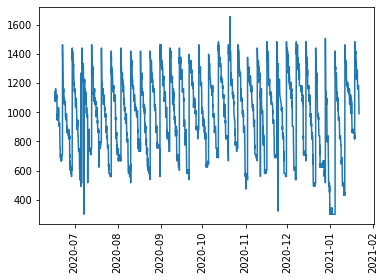

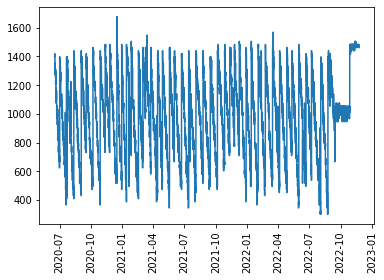

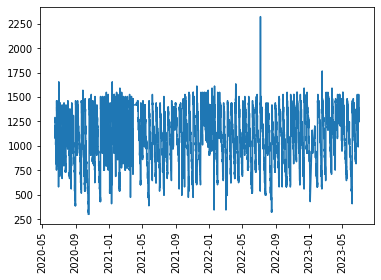

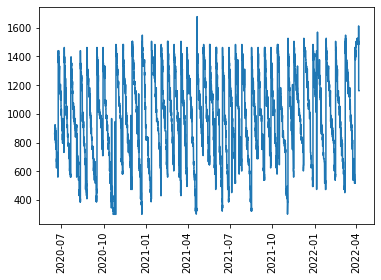

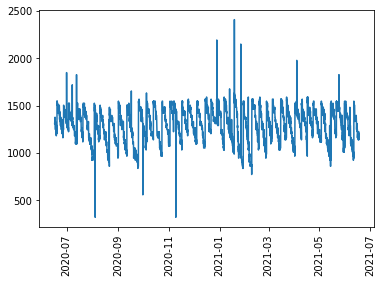

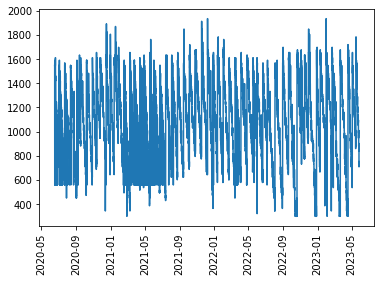

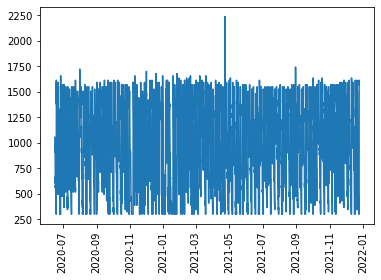

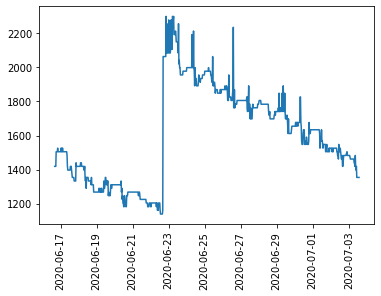

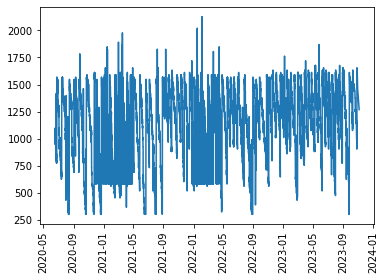

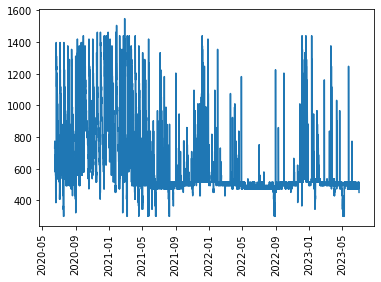

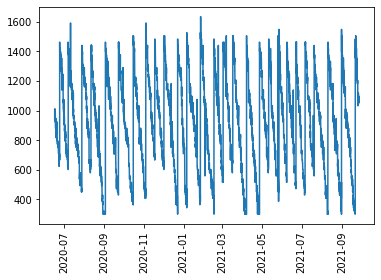

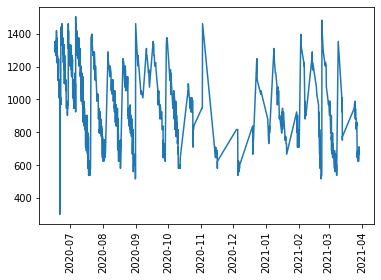

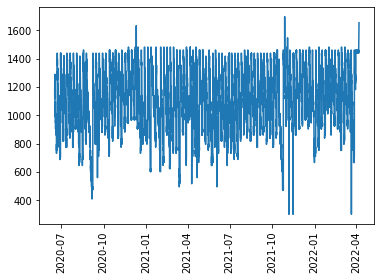

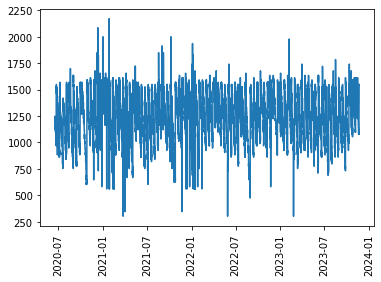

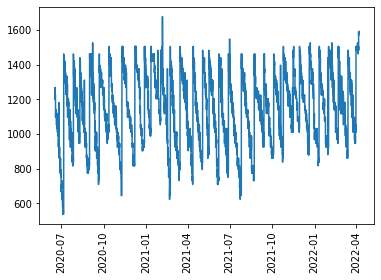

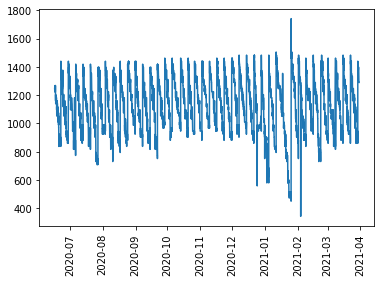

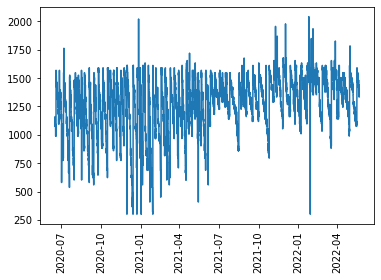

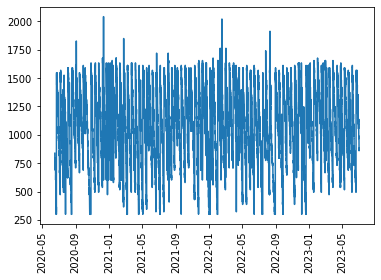

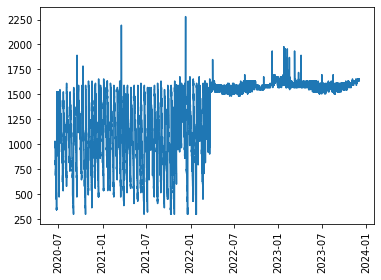

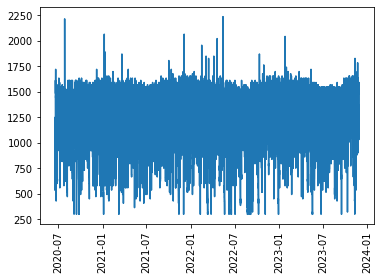

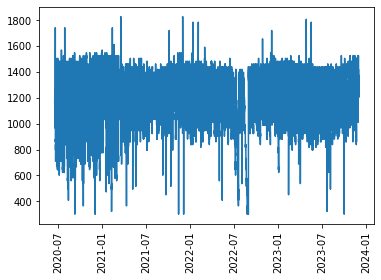

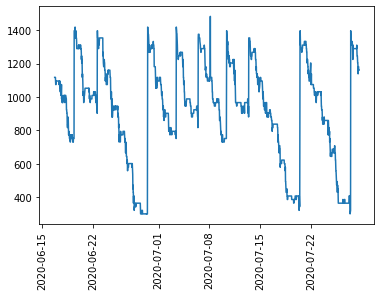

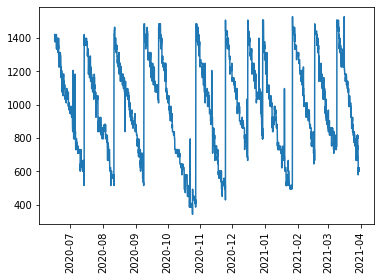

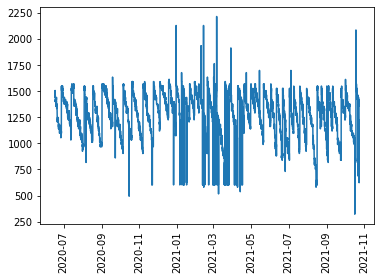

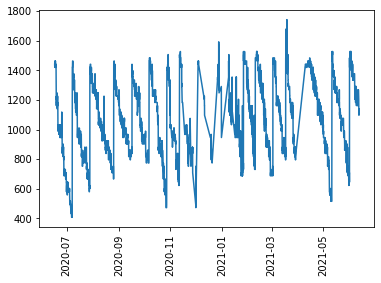

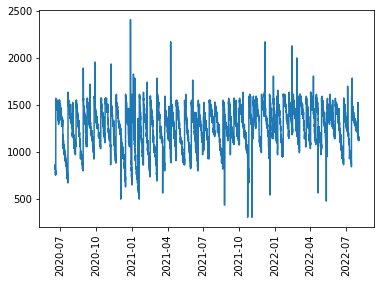

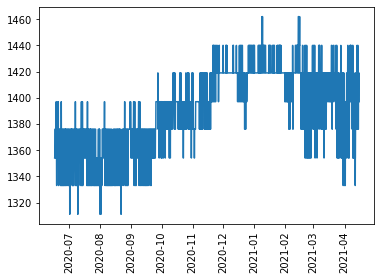

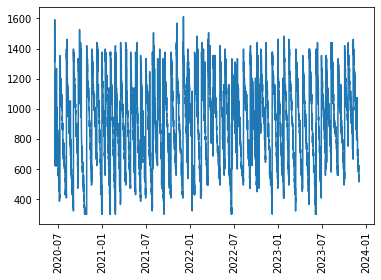

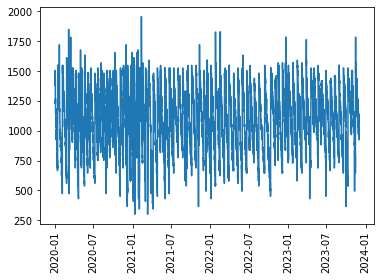

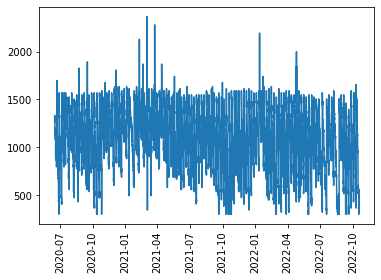

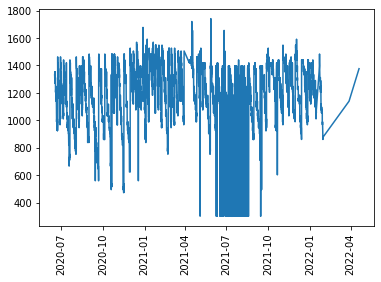

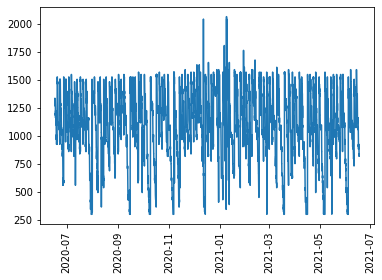

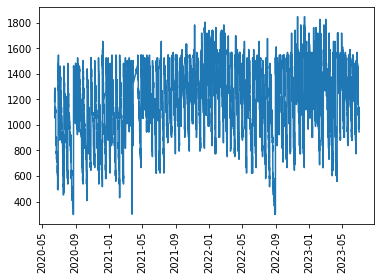

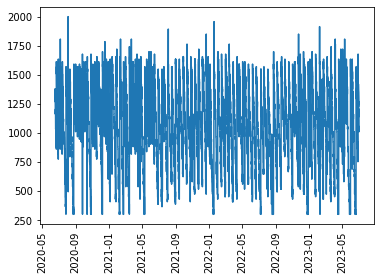

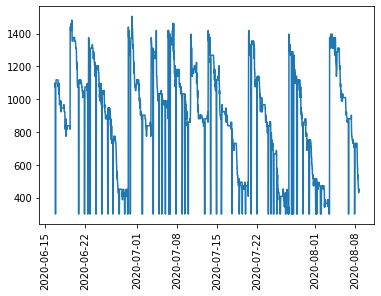

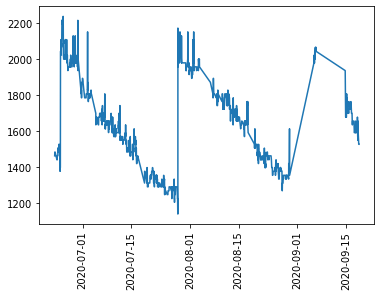

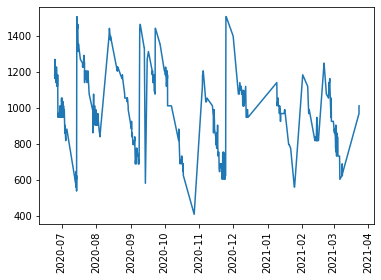

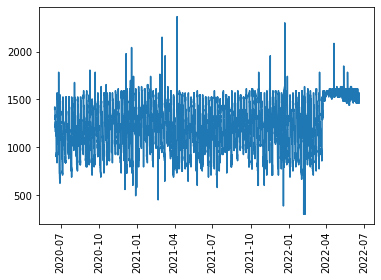

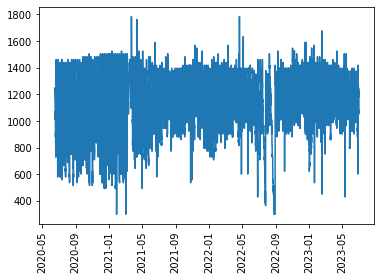

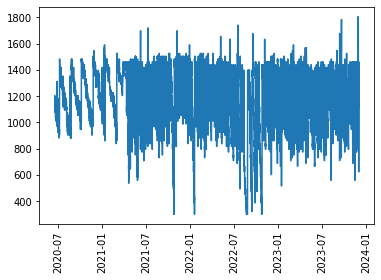

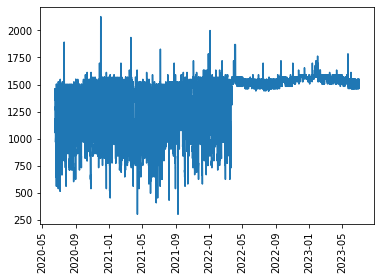

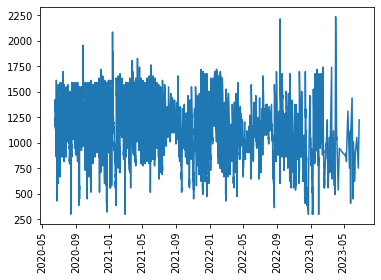

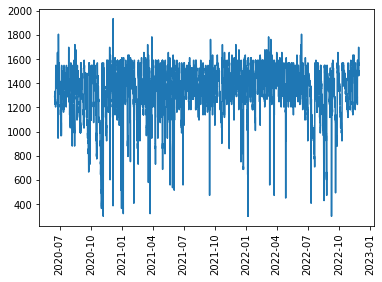

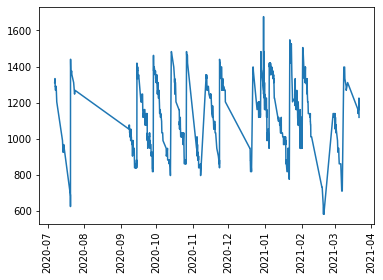

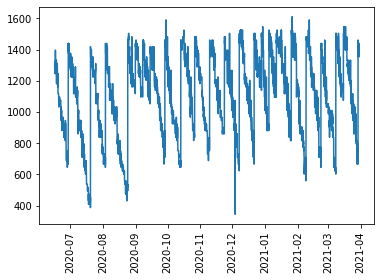

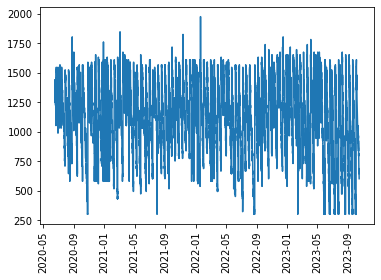

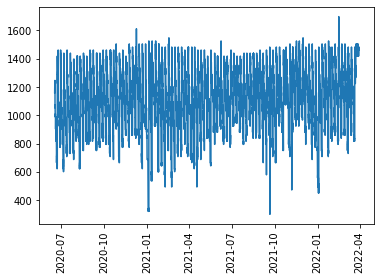

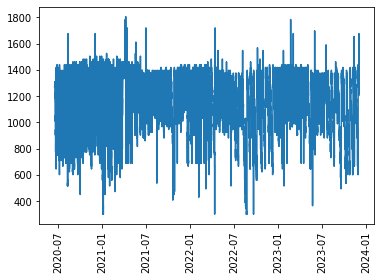

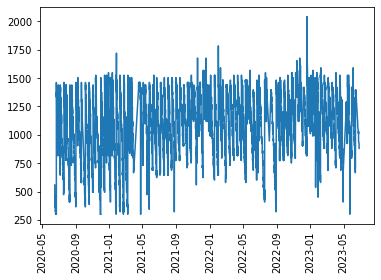

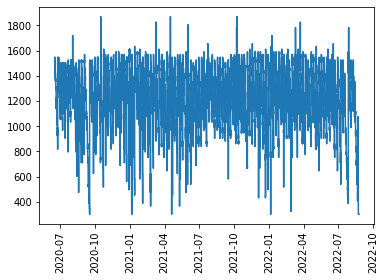

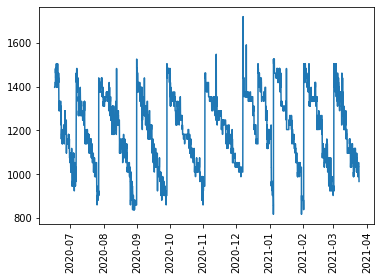

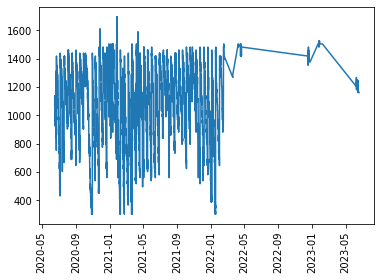

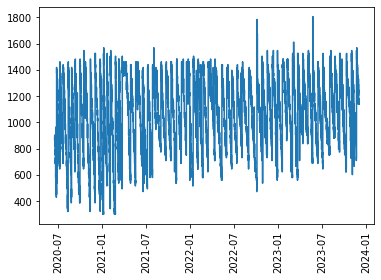

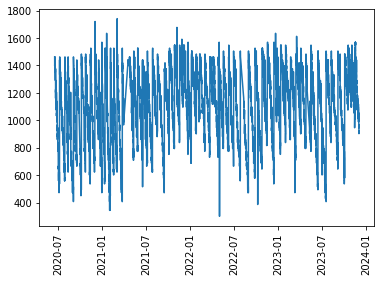

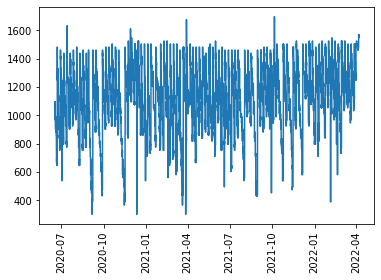

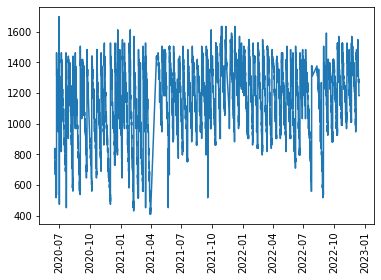

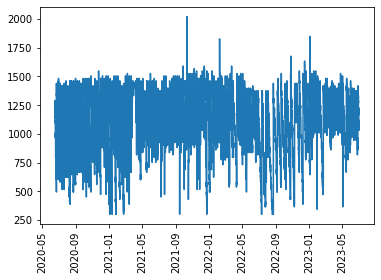

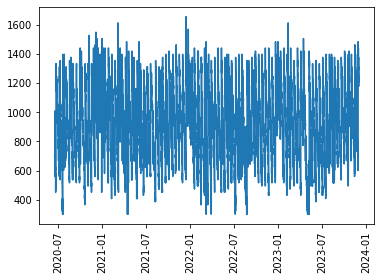

In [38]:
for device_id in set(df['device_id'].values.tolist()):
    print(device_id)
    device_df = df[df['device_id'] == device_id]
    plt.figure()
    plt.plot(device_df['datetime'],device_df['data_distance'])
    plt.xticks(rotation='vertical')



In [49]:
device_id = '79d9a5cb-3704-4a21-aedf-5989c70baed0'
device_id = '6d43f154-1009-470a-95a2-f40fe4b8a204'
device_df = df[df['device_id'] == device_id]

In [50]:
%matplotlib inline

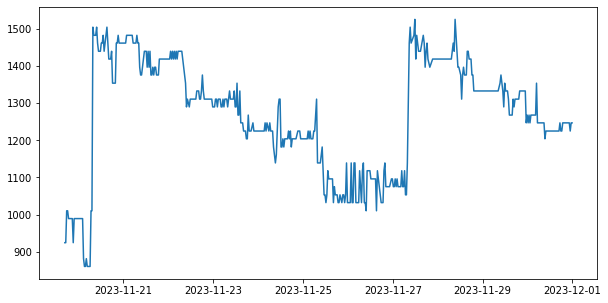

In [55]:
plt.figure(figsize=(10,5))
plt.plot(device_df['datetime'].values[-500:],device_df['data_distance'].values[-500:])

In [56]:

from statsmodels.nonparametric.kernel_regression import KernelReg as kr 

In [58]:
kr(device_df['data_distance'].values[-500:],device_df['seconds'].values[-500:],var_type='u')

KeyError: 'seconds'

In [59]:
import orbit

In [60]:
from orbit.models import KTR

ModuleNotFoundError: No module named 'orbit.models'

In [61]:
print(orbit.__version__)

AttributeError: module 'orbit' has no attribute '__version__'

In [62]:
import scipy.signal

In [94]:
last_n = 4000
device_df['change'] = np.concatenate((device_df['data_distance'].values[2:] - device_df['data_distance'].values[:-2],[0,0]))

/tmp/ipykernel_98497/1937626693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_df['change'] = np.concatenate((device_df['data_distance'].values[2:] - device_df['data_distance'].values[:-2],[0,0]))


In [96]:
estimates = scipy.signal.medfilt(device_df['data_distance'].values[-last_n:],kernel_size=11)
changes = estimates[2:] - estimates[:-2]

22.0
0
2020-06-16 16:09:08+02:00
0.0
1
2020-06-16 16:39:08+02:00
0.0
2
2020-06-16 17:09:08+02:00
0.0
3
2020-06-16 17:39:07+02:00
0.0
4
2020-06-16 18:09:07+02:00
0.0
5
2020-06-16 18:39:07+02:00
0.0
6
2020-06-16 19:09:07+02:00
0.0
7
2020-06-16 19:39:07+02:00
0.0
8
2020-06-16 20:09:07+02:00
21.0
9
2020-06-16 20:39:07+02:00
21.0
10
2020-06-16 21:09:07+02:00
0.0
11
2020-06-16 21:39:06+02:00
0.0
12
2020-06-16 22:09:06+02:00
0.0
13
2020-06-16 22:39:06+02:00
0.0
14
2020-06-16 23:09:06+02:00
0.0
15
2020-06-16 23:39:06+02:00
0.0
16
2020-06-17 00:09:06+02:00
0.0
17
2020-06-17 00:39:06+02:00
0.0
18
2020-06-17 01:09:06+02:00
0.0
19
2020-06-17 01:39:06+02:00
0.0
20
2020-06-17 02:09:05+02:00
0.0
21
2020-06-17 02:39:05+02:00
0.0
22
2020-06-17 03:09:05+02:00
0.0
23
2020-06-17 03:39:05+02:00
0.0
24
2020-06-17 04:09:05+02:00
0.0
25
2020-06-17 04:39:05+02:00
0.0
26
2020-06-17 05:09:05+02:00
0.0
27
2020-06-17 05:39:05+02:00
0.0
28
2020-06-17 06:09:04+02:00
0.0
29
2020-06-17 06:39:04+02:00
0.0
30
2020-06-17

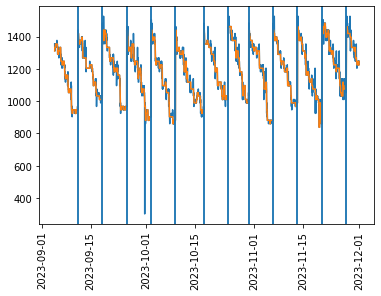

In [101]:
plt.plot(device_df['datetime'].values[-last_n:],device_df['data_distance'].values[-last_n:])
plt.plot(device_df['datetime'].values[-last_n:],estimates)
plt.xticks(rotation='vertical')
for idx, change in enumerate(changes):
    print(change)
    print(idx)
    print(device_df['datetime'].iloc[idx])
    if change > 300:
        plt.axvline(x = device_df['datetime'].values[-last_n:][idx])

In [32]:
import numpy as np
from scipy.signal import argrelextrema


In [33]:
ax_ind = argrelextrema(estimates, np.greater)

In [35]:
device_df['seconds'] = device_df['datetime'].apply(lambda x: x.timestamp())

/tmp/ipykernel_98497/2639081827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_df['seconds'] = device_df['datetime'].apply(lambda x: x.timestamp())


In [36]:
device_df

,measured_at,data_distance,geo_point_2d,device_id,color,datetime,seconds
336732,2020-06-16T16:29:00+02:00,1096.0,"47.40365, 9.33947",79d9a5cb-3704-4a21-aedf-5989c70baed0,gruen,2020-06-16 16:29:00+02:00,1.592318e+09
147829,2020-06-16T16:59:00+02:00,1139.0,"47.40365, 9.33947",79d9a5cb-3704-4a21-aedf-5989c70baed0,gruen,2020-06-16 16:59:00+02:00,1.592320e+09
740992,2020-06-16T17:29:00+02:00,1118.0,"47.40365, 9.33947",79d9a5cb-3704-4a21-aedf-5989c70baed0,gruen,2020-06-16 17:29:00+02:00,1.592321e+09
369725,2020-06-16T17:59:00+02:00,1139.0,"47.40365, 9.33947",79d9a5cb-3704-4a21-aedf-5989c70baed0,gruen,2020-06-16 17:59:00+02:00,1.592323e+09
147797,2020-06-16T18:59:00+02:00,1075.0,"47.40365, 9.33947",79d9a5cb-3704-4a21-aedf-5989c70baed0,gruen,2020-06-16 18:59:00+02:00,1.592327e+09
...,...,...,...,...,...,...,...
137419,2021-01-21T12:39:20+01:00,1032.0,"47.40365, 9.33947",79d9a5cb-3704-4a21-aedf-5989c70baed0,gruen,2021-01-21 12:39:20+01:00,1.611229e+09
137401,2021-01-21T13:09:20+01:00,1032.0,"47.40365, 9.33947",79d9a5cb-3704-4a21-aedf-5989c70baed0,gruen,2021-01-21 13:09:20+01:00,1.611231e+09
800453,2021-01-21T13:39:20+01:00,1032.0,"47.40365, 9.33947",79d9a5cb-3704-4a21-aedf-5989c70baed0,gruen,2021-01-21 13:39:20+01:00,1.611233e+09
424412,2021-01-21T14:09:20+01:00,989.0,"47.40365, 9.33947",79d9a5cb-3704-4a21-aedf-5989c70baed0,gruen,2021-01-21 14:09:20+01:00,1.611235e+09


In [37]:
from statsmodels.nonparametric.kernel_regression import KernelReg as KR

In [41]:
kr = KR(device_df['data_distance'],device_df['seconds'],var_type='c')

In [42]:
fits = kr.fit(device_df['seconds'])

In [46]:
fits[0]

array([1106.13029977, 1119.07068124, 1122.32068336, ..., 1015.34000548,
       1001.25911292,  985.27137868])

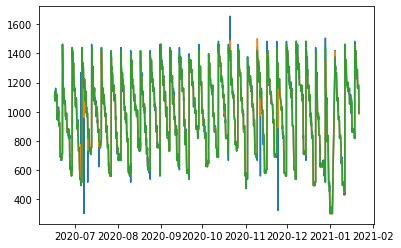

In [48]:
plt.plot(device_df['datetime'],device_df['data_distance'])
plt.plot(device_df['datetime'],fits[0])
plt.plot(device_df['datetime'],estimates)

In [59]:
leerungen_df= pd.read_csv('../scripts/preprocess/Leerungszeitpunkte Braunglas.csv')

In [61]:
from scipy.signal import medfilt

In [72]:
dev_df = pd.DataFrame(columns=['device_id','max_val','min_val','max_capacity'])
for dev_id in set(df['device_id'].values):
    estimates = medfilt(df[df['device_id'] == dev_id]['data_distance'],kernel_size=11)
    print(dev_id, np.max(estimates), np.min(estimates))
    dev_df = pd.concat((dev_df,pd.DataFrame({'device_id':dev_id,'max_val':np.max(estimates),'min_val':np.min(estimates),'max_capacity':np.max(estimates)-np.min(estimates)},index=[0])),ignore_index=True)


bd1f5d39-0361-4717-9054-845ac2fa33bd 1763.0 301.0
496ebab5-e27f-46a4-91bd-28e5086eb594 1655.0 494.0


/tmp/ipykernel_163991/3726607082.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dev_df = pd.concat((dev_df,pd.DataFrame({'device_id':dev_id,'max_val':np.max(estimates),'min_val':np.min(estimates),'max_capacity':np.max(estimates)-np.min(estimates)},index=[0])),ignore_index=True)


624e62e7-2b0b-43dc-a992-77ab95adbbb8 1784.0 387.0
cfcfb74d-b13e-43fb-bc59-9eee4f6be818 1784.0 301.0
e785cb18-96e1-4215-931a-82a731d2ee5a 1591.0 301.0
3dd2b101-9f8d-41fa-9dc3-823729aefabb 1505.0 301.0
ae87483e-d1ed-4169-a05b-5f53d38c7185 1720.0 301.0
d8a3a3ca-39d7-46a2-9c50-0b5bc1717979 1505.0 365.0
0b011106-e5fe-4202-92bd-c89abd042249 1612.0 602.0
134fc269-ec25-466f-82e7-780beb314108 1548.0 301.0
1607ca61-c966-483d-bbfb-d97027d507c1 1505.0 838.0
a1f343aa-dbbd-4b7e-ac42-58ee4bfffd06 1462.0 301.0
8ddb5dd3-0822-485e-aebb-973df12c9dc9 1526.0 408.0
a7bbd831-d444-4011-b6df-37b47b8e218d 1612.0 301.0
632c0d31-1145-49b7-b327-952ab64369d2 1419.0 301.0
aae16e11-7f7e-4251-9e73-fd836db67b79 1677.0 301.0
1e8d1b09-d186-495e-bd1f-cb06afdd5b21 1526.0 301.0
36816c9e-3b69-4b8c-b9f7-150b0edf94db 1591.0 537.0
2e4a8f6d-d398-4749-bc74-a24efa3f5644 1569.0 322.0
a3e91e80-9b8d-4bd6-bbd7-011319e05a0c 1505.0 301.0
7cfecc22-d53c-45b4-8eb2-cb8219ca531e 2214.0 1225.0
f2aaa75a-0ea0-4e4a-8363-7c7a98c160d9 1462.0 473.0

In [ ]:
for col in leerungen_df.columns:
    device_df = df[df['device_id'] == col]
    for 